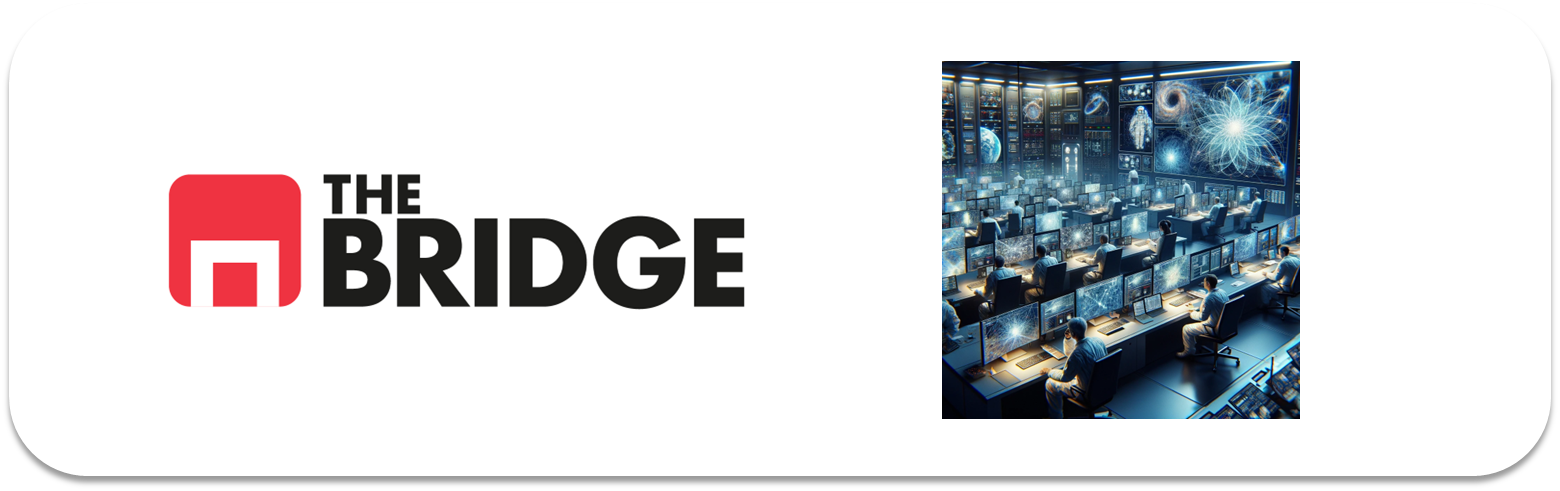

## PRACTICA OBLIGATORIA: **Redes Convolucionales**

* La práctica obligatoria de esta unidad consiste en un ejercicio de construcción de una red convolucional con Keras para la clasificación de imagenes de simpáticos perretes y gatetes. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [3]:
import bootcampviztools as bt
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
# filter warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split


### Problema de Negocio y dataset

Una conocida empresa de información inmobiliaria utiliza un CAPTCHA visual de perros y gatos para detectar webscrappings intensivos y ataques de denegación de servicio. Últimamente, ha detectado que su sistema está empezando a flojear, es decir que hay muchos sistemas de detección automática de imágenes que son capaces de detectar que es un perro y un gato y salterse el CAPTCHA antirobots. Por eso nos ha pedido que entrenemos un modelo potente de clasificación que emule a estos sistemas con el objetivo de emplear como fotografías para el CAPTCHA aquellas que no sepa detectar este sistema emulador de chicos malos.  

Pues manos a la obra, tenemos que seleccionar en un conjunto de 1000 imágenes aquellas que peor se le daría clasificar a un potencial sistema anti-CAPTCHA.  

Para ello vamos a emplear un conjunto de train de 4000 imágenes de perretes y gatetes que se encuentran distribuidas en "data" en cuatro directorios "github_train_0",  "github_train_1", "githun_train_2" y "github_train_3". Los datos de las imagenes que tenemos que clasificar y luego seleccionar como las más "difíciles" están en "data" en el directorio "github_test".


### Se pide

1. Crear los datasets X,y de train y test, leyendo las imágenes de los directorios correspondientes (tendrás que leer todas las imágenes de los cuatro directorios para train) y a la vez que se leen adpatar su resolución para que todas tengan un tamaño de 32x32. En este caso puedes adaptar las funciones de los ejercicios de la unidad. NOTA: Ten en cuenta que la clase a la que pertenece en la foto está en el nombre del archivo.

2. Crea un modelo DL basado en redes convolucionales con al menos dos juegos Convolucional-Pooling. Sigue todo el proceso de ML (visualización del dataset, MiniEDA, Construcción del modelo)

3. Entrenar el modelo con un callback de Earlystopping con paciencia la que tengas :-). Muestra su historial de entrenamiento.

4. Evalua el modelo, haz un reporte de clasificacion y muestra la matriz de confianza.

5. Es el momento de seleccionar las imagenes: Selecciona el 10% de imágenes mal clasificadas de una y otra clase que tengan el mayor nivel de confianza de que pertenencían a la clase errónea. Es decir las imágenes de perros clasificadas como gatos y con la probabilidad de ser perror más alta.


### Extra (para hacer en clase)

Repite los pasos 3 a 5 utilizando el generador de imágenes sintéticas o Image Augmentation de Keras. 



In [4]:
from tensorflow.keras.utils import image_dataset_from_directory

In [5]:
train_set = image_dataset_from_directory(
    "data/train",  
    labels="inferred",     
    label_mode="int",      
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(500, 500),
    batch_size=32)   
validation_set = image_dataset_from_directory(
    "data/train",  
    labels="inferred",    
    label_mode="int",      
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(500, 500),
    batch_size=32)

Found 4000 files belonging to 2 classes.
Using 3200 files for training.
Found 4000 files belonging to 2 classes.
Using 800 files for validation.


In [6]:
test_set = image_dataset_from_directory(
    "data/test",   # cambia esto por la ruta real
    labels="inferred",     # usa el nombre de las carpetas como etiquetas
    label_mode="int",      # entero para clasificación (puedes usar "categorical" si prefieres one-hot)
    image_size=(500, 500), # resize a un tamaño fijo
    batch_size=32)   

Found 1000 files belonging to 1 classes.


In [7]:
target = "label"

In [8]:
for images, labels in train_set.take(1):
    print(images.shape)  # (32, 224, 224, 3)
    print(labels.numpy())  

(32, 500, 500, 3)
[1 1 1 1 0 0 0 0 0 1 0 0 1 1 1 0 0 1 0 0 1 0 0 0 1 0 1 1 0 1 1 1]


In [9]:
train_set.class_names

['0', '1']

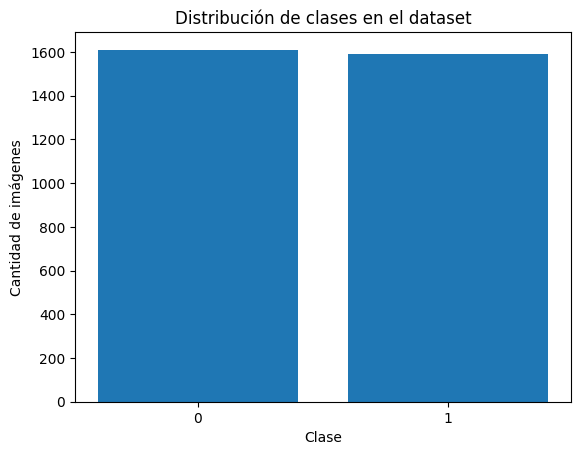

In [10]:
all_labels = []
for _, labels in train_set:
    all_labels.extend(labels.numpy())

# Convertir a array de NumPy
all_labels = np.array(all_labels)

# Calcular la distribución
classes, counts = np.unique(all_labels, return_counts=True)

# Mostrar gráfico
plt.bar(classes, counts)
plt.xlabel("Clase")
plt.ylabel("Cantidad de imágenes")
plt.title("Distribución de clases en el dataset")
plt.xticks(classes)
plt.show()

In [11]:
traduced_labels = {0: "gato", 1: "perro"}

In [12]:
from keras.models import Sequential

In [ ]:
 # De aquí sacamos el tipo de modelo que vamos a construir, que sigue siendo una secuencia o cadena de capas consecutivas

model = Sequential() # creamos el modelo para ir añadiendo las capas

In [13]:
from tensorflow.keras.layers import Rescaling

In [38]:
from keras.layers import Conv2D # Esta es la capa para convolucionales con entrada de 2 dimensiones 
model.add(Rescaling(1./255, input_shape=(500, 500, 3))) # Normalizamos los valores de los píxeles de las imágenes a un rango entre 0 y 1
model.add(Conv2D(filters = 8, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (500,500,3))) # Fijate en dos cosas, en la el input_shape (ancho,alto,num_canales) 
                                                            # y en que no decimos nada de strides (el argumento para el stride), porque por defecto está a (1,1)


In [14]:
from keras.layers import MaxPool2D # Esta es la clase que corresponde a las capas de Pooling que hacen maxpooling sobre datos de entrada en 2D


In [ ]:
model.add(MaxPool2D(pool_size=(2,2)))

In [15]:
from keras.layers import Dropout

In [ ]:


model.add(Dropout(rate= 0.25))

In [41]:
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))

model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

model.add(Dropout(0.25))

In [16]:
from keras.layers import Flatten, Dense

In [43]:

model.add(Flatten()) 

model.add(Dense(256, activation = "relu"))

model.add(Dropout(0.5))
model.add(Dense(2, activation = "softmax"))

In [44]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [45]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 500, 500, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 500, 500, 8)    │           608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 250, 250, 8)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 250, 250, 8)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 250, 250, 16)   │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 125, 125, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 125, 125, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 250000)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │    64,000,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 64,002,546 (244.15 MB)

 Trainable params: 64,002,546 (244.15 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [18]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("callback_model.keras")
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5, 
                                                  restore_best_weights=True)

In [50]:
history = model.fit(train_set, epochs=100,
                    validation_data=validation_set,
                    batch_size=64,
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 230s 2s/step - accuracy: 0.5426 - loss: 9.5555 - val_accuracy: 0.5813 - val_loss: 0.6677
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 218s 2s/step - accuracy: 0.6163 - loss: 0.6465 - val_accuracy: 0.5975 - val_loss: 0.6476
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 213s 2s/step - accuracy: 0.6553 - loss: 0.6154 - val_accuracy: 0.6363 - val_loss: 0.6425
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 198s 2s/step - accuracy: 0.7289 - loss: 0.5425 - val_accuracy: 0.6000 - val_loss: 0.6505
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 230s 2s/step - accuracy: 0.7930 - loss: 0.4514 - val_accuracy: 0.6237 - val_loss: 0.6779
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 7768s 78s/step - accuracy: 0.8381 - loss: 0.3613 - val_accuracy: 0.6075 - val_loss: 0.7141
Epoch 7/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 226s 2s/step - accuracy: 0.8708 - loss: 0.2910 - val_accuracy: 0.6200 - val_loss: 0.7366
Epoch 8/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 214s 2s/step - accuracy: 0.9281 - loss: 0.2036 

In [19]:
model = keras.models.load_model("callback_model.keras")

In [20]:
history = model.fit(train_set, epochs=10,
                    validation_data=validation_set,
                    batch_size=64,
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/10


100/100 ━━━━━━━━━━━━━━━━━━━━ 200s 2s/step - accuracy: 0.9626 - loss: 0.1188 - val_accuracy: 0.6250 - val_loss: 1.0067
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 213s 2s/step - accuracy: 0.9674 - loss: 0.0936 - val_accuracy: 0.6300 - val_loss: 0.9139
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 205s 2s/step - accuracy: 0.9794 - loss: 0.0752 - val_accuracy: 0.6212 - val_loss: 1.0549
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 193s 2s/step - accuracy: 0.9844 - loss: 0.0583 - val_accuracy: 0.6212 - val_loss: 1.3467
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 199s 2s/step - accuracy: 0.9860 - loss: 0.0510 - val_accuracy: 0.6137 - val_loss: 1.3785
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 187s 2s/step - accuracy: 0.9890 - loss: 0.0405 - val_accuracy: 0.6275 - val_loss: 1.3523
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 184s 2s/step - accuracy: 0.9823 - loss: 0.0539 - val_accuracy: 0.6375 - val_loss: 1.5059


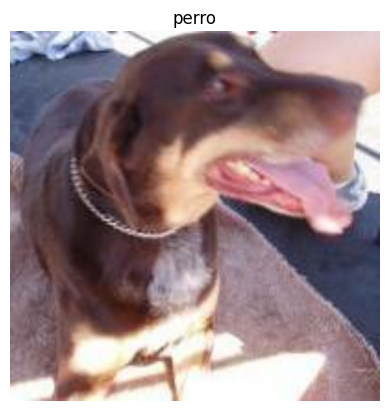

In [22]:
# observamos una imagen con su label
for images, labels in train_set.take(1):
    plt.imshow(images[0].numpy().astype("uint8"))
    plt.title(traduced_labels[labels[0].numpy()])
    plt.axis("off")
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


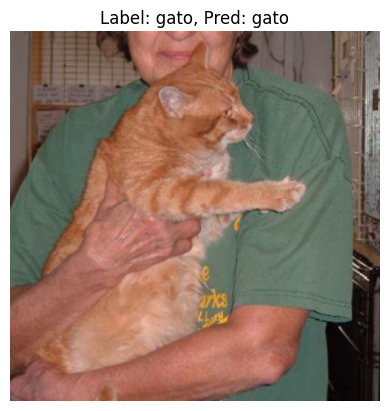

In [23]:
# vemos una imagen junto a su label y su prediccion
for images, labels in train_set.take(1):
    plt.imshow(images[0].numpy().astype("uint8"))
    pred = model.predict(images)
    plt.title(f"Label: {traduced_labels[labels[0].numpy()]}, Pred: {traduced_labels[np.argmax(pred[0])]}")
    plt.axis("off")
    plt.show()

In [24]:
model.evaluate(test_set)

32/32 ━━━━━━━━━━━━━━━━━━━━ 11s 329ms/step - accuracy: 0.5306 - loss: 1.4306


[1.4473552703857422, 0.5239999890327454]

In [27]:
y_pred = [np.argmax(prediction) for prediction in  model.predict(validation_set)]
print(classification_report(validation_set.class_names, y_pred, target_names=traduced_labels.values()))

25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 309ms/step


ValueError: Found input variables with inconsistent numbers of samples: [2, 800]

In [30]:
import os

ruta_test = "data/Test/github_test"

data = []

for fname in os.listdir(ruta_test):
    if fname.endswith((".jpg", ".png")):
        label = fname.split(".")[0]  # Extrae 'gato' de 'gato_001.jpg'
        filepath = os.path.join(ruta_test, fname)
        data.append((filepath, label))

df_test = pd.DataFrame(data, columns=["filepath", "label"])
print(df_test.head())

                              filepath label
0  data/Test/github_test\cat.10705.jpg   cat
1  data/Test/github_test\cat.10711.jpg   cat
2  data/Test/github_test\cat.10714.jpg   cat
3  data/Test/github_test\cat.10715.jpg   cat
4  data/Test/github_test\cat.10716.jpg   cat


In [33]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Crea un generador de imágenes (rescale si es necesario)
test_datagen = ImageDataGenerator(rescale=1./255)

# Crear el dataset desde el DataFrame
test_generator = test_datagen.flow_from_dataframe(
    dataframe=df_test,
    x_col="filepath",
    y_col="label",
    target_size=(500, 500),       # mismo tamaño que usaste en entrenamiento
    class_mode="categorical",     # o "sparse" si prefieres etiquetas como int
    batch_size=32,
    shuffle=False                 # importante para evaluar o predecir
)

Found 1000 validated image filenames belonging to 2 classes.


In [34]:
test_generator.class_indices

{'cat': 0, 'dog': 1}

In [41]:
pred_probs = model.predict(test_generator)
pred_labels = np.argmax(pred_probs, axis=1)

32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 390ms/step


In [42]:
# evaluamos el modelo con las predicciones
print(classification_report(test_generator.classes, pred_labels, target_names=test_generator.class_indices.keys()))

              precision    recall  f1-score   support

         cat       0.50      1.00      0.67       500
         dog       0.00      0.00      0.00       500

    accuracy                           0.50      1000
   macro avg       0.25      0.50      0.33      1000
weighted avg       0.25      0.50      0.33      1000



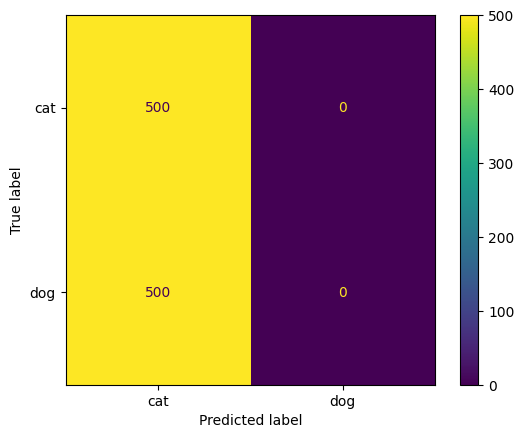

In [43]:
#matriz de confusión
ConfusionMatrixDisplay.from_predictions(test_generator.classes, pred_labels,
                                        display_labels=test_generator.class_indices.keys())